# Prem Hyp attention distribution

In [11]:
import os
import pickle
from tabulate import tabulate
from scipy.stats import ttest_ind
import numpy as np

cwd = os.getcwd().split(os.path.sep)
while cwd[-1] != "stage_4_gm":
    os.chdir("..")
    cwd = os.getcwd().split(os.path.sep)
dir = os.path.join(".cache", "plots", "entropy_study")
with open(os.path.join(dir, "attention_prem_hyp.pickle"), "rb") as f:
    attention = pickle.load(f)
with open(os.path.join(dir, "entropy_prem_hyp.pickle"), "rb") as f:
    entropy = pickle.load(f)

In [12]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from attention_algorithms.attention_metrics import plot_color_from_ax, default_plot_colormap

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Visualisation of the maps

In [14]:
%%capture
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
plot_color_from_ax(attention["entailement"].mean(axis=-1), axes[0],
                   ylabel="layer",
                   xlabel="",
                   xstick=["premise", "hypothesis"],
                   title = "Entailement")

plot_color_from_ax(attention["neutral"].mean(axis=-1), axes[1],
                   ylabel="layer",
                   xlabel="",
                   xstick=["premise", "hypothesis"],
                   title = "Neutral")

plot_color_from_ax(attention["contradiction"].mean(axis=-1), axes[2],
                   ylabel="layer",
                   xlabel="",
                   xstick=["premise", "hypothesis"],
                   title = "Contradiction")


fig.savefig(os.path.join(os.getcwd(),".cache", "plots", "entropy_study", "prem_hyp_attention_study.png"))

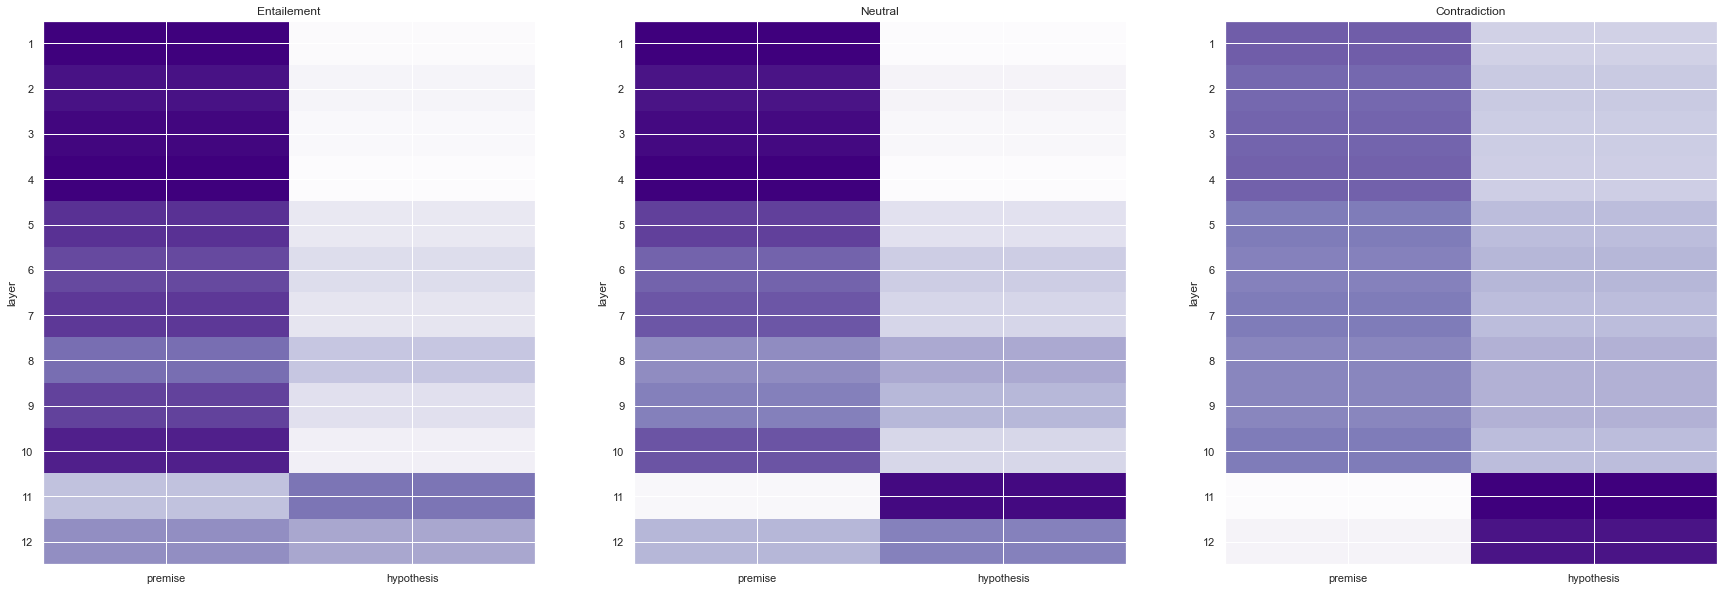

In [15]:
fig

évaluation des p_value pour avoir une idée des p_value entre les différents 

## The different tests

creation of the table for the test

In [16]:
def p_value_signifiance(p):
    if p <= 0.001:
        return "* * *"
    elif p <= 0.01:
        return "* *"
    elif p <= 0.05:
        return "*"
    else :
        return "."


def create_table(test_label):
    table = [["Layer","T-Stats", "p-value", "signifiance"]]
    for i in range(12):
        row = [f"Layer {i+1}",
               np.round(test_label[0][i], 3), 
               np.round(test_label[1][i], 3), 
               p_value_signifiance(test_label[1][i])]
        table.append(row)
        
    return table

In [17]:
test_entailement = ttest_ind(attention["entailement"][:,0,:], attention["entailement"][:,1,:], axis=-1)
test_neutral = ttest_ind(attention["neutral"][:,0,:], attention["neutral"][:,1,:], axis=-1)
test_contradiction = ttest_ind(attention["contradiction"][:,0,:], attention["contradiction"][:,1,:], axis=-1)

In [18]:
print(tabulate(create_table(test_entailement), headers="firstrow"))
print()
print(tabulate(create_table(test_neutral), headers="firstrow"))
print()
print(tabulate(create_table(test_contradiction), headers="firstrow"))

Layer       T-Stats    p-value  signifiance
--------  ---------  ---------  -------------
Layer 1     130.841          0  * * *
Layer 2     117.689          0  * * *
Layer 3     129.012          0  * * *
Layer 4     132.361          0  * * *
Layer 5      65.249          0  * * *
Layer 6      43.029          0  * * *
Layer 7      46.449          0  * * *
Layer 8      21.74           0  * * *
Layer 9      35.756          0  * * *
Layer 10     50.82           0  * * *
Layer 11    -14.765          0  * * *
Layer 12      6.4            0  * * *

Layer       T-Stats    p-value  signifiance
--------  ---------  ---------  -------------
Layer 1      77.201          0  * * *
Layer 2      68.415          0  * * *
Layer 3      73.211          0  * * *
Layer 4      75.765          0  * * *
Layer 5      37.144          0  * * *
Layer 6      21.101          0  * * *
Layer 7      23.367          0  * * *
Layer 8       5.358          0  * * *
Layer 9       9.47           0  * * *
Layer 10     21.019  

il y a donc bien des différences significatives entre les différentes parties de la phrases peu import la couche et peu import le label
- pour la label contradiction on a une forte concentration sur l'hypothèse à partir de la couche 12

## Entropy on the prem and the hyp

In [20]:
%%capture
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
plot_color_from_ax(entropy["entailement"].mean(axis=-1), axes[0],
                   ylabel="layer",
                   xlabel="",
                   xstick=["premise", "hypothesis"],
                   title = "Entailement")

plot_color_from_ax(entropy["neutral"].mean(axis=-1), axes[1],
                   ylabel="layer",
                   xlabel="",
                   xstick=["premise", "hypothesis"],
                   title = "Neutral")

plot_color_from_ax(entropy["contradiction"].mean(axis=-1), axes[2],
                   ylabel="layer",
                   xlabel="",
                   xstick=["premise", "hypothesis"],
                   title = "Contradiction")


fig.savefig(os.path.join(os.getcwd(),".cache", "plots", "entropy_study", "prem_hyp_entropy_study.png"))

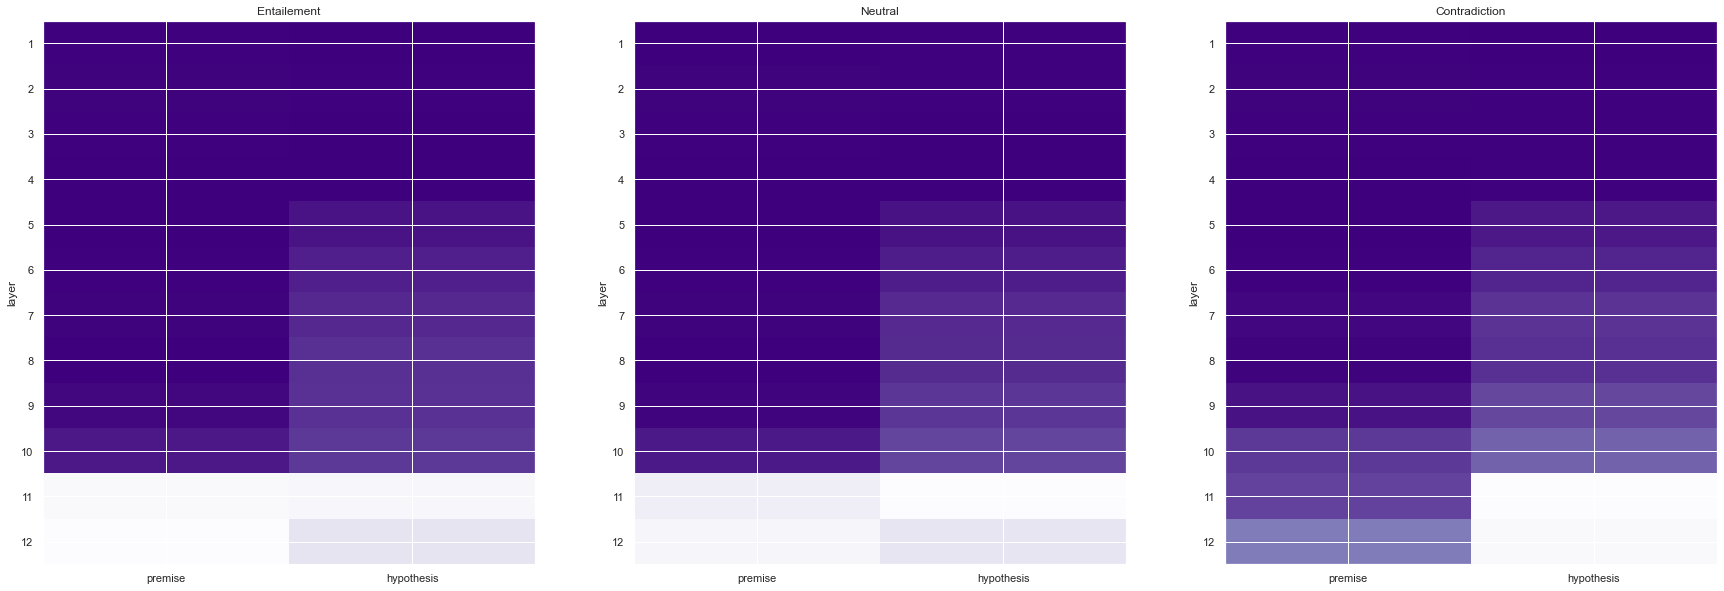

In [21]:
fig

In [22]:
test_entailement = ttest_ind(entropy["entailement"][:,0,:], entropy["entailement"][:,1,:], axis=-1)
test_neutral = ttest_ind(entropy["neutral"][:,0,:], entropy["neutral"][:,1,:], axis=-1)
test_contradiction = ttest_ind(entropy["contradiction"][:,0,:], entropy["contradiction"][:,1,:], axis=-1)

In [23]:
print(tabulate(create_table(test_entailement), headers="firstrow"))
print()
print(tabulate(create_table(test_neutral), headers="firstrow"))
print()
print(tabulate(create_table(test_contradiction), headers="firstrow"))

Layer       T-Stats    p-value  signifiance
--------  ---------  ---------  -------------
Layer 1      -7.018      0      * * *
Layer 2     -30.15       0      * * *
Layer 3      -7.516      0      * * *
Layer 4      -6.333      0      * * *
Layer 5      15.842      0      * * *
Layer 6      19.094      0      * * *
Layer 7      20.057      0      * * *
Layer 8      23.539      0      * * *
Layer 9      20.387      0      * * *
Layer 10     15.115      0      * * *
Layer 11     -2.547      0.011  *
Layer 12    -21.526      0      * * *

Layer       T-Stats    p-value  signifiance
--------  ---------  ---------  -------------
Layer 1       3.393      0.001  * * *
Layer 2     -44.357      0      * * *
Layer 3      -8.347      0      * * *
Layer 4      -2.336      0.02   *
Layer 5      14.737      0      * * *
Layer 6      17.986      0      * * *
Layer 7      21.081      0      * * *
Layer 8      21.66       0      * * *
Layer 9      23.133      0      * * *
Layer 10     20.848      0   

Nous avons ainsi des distributions qui sont déséquilibrées. Nous avons plus d'attention sur la premise mais cela est du à une entropie qui est plus forte